# Logistic Regression: Age vs. Smoking Quantity

In this notebook, we specifically analyze the relationship between **Age**, the **Number of Cigarettes Smoked Per Day**, and the risk of developing **Coronary Heart Disease (CHD)**.

We use the **Framingham Heart Study** dataset.

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm

### 1. Load and specificially select Age & Smoking Data
We load the dataset and strictly isolate `age` and `cigsPerDay` as our features.

First, we load the data from `github`.

In [2]:
url = "https://raw.githubusercontent.com/GauravPadawe/Framingham-Heart-Study/master/framingham.csv"
df = pd.read_csv(url)

Next, we select the columns we want to analyze.

In [3]:
df = df[['age', 'cigsPerDay', 'TenYearCHD']]

We drop the rows with missing values e.g., unknown smoking history.

In [4]:
df = df.dropna()

Let us take a look.

In [5]:
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (4211, 3)


,age,cigsPerDay,TenYearCHD
0,39,0.0,0
1,46,0.0,0
2,48,20.0,0
3,61,30.0,1
4,46,23.0,0


### 2. Train Logistic Regression
We train the model to separate the classes based *only* on these two features.

We define the feature matrix `X` and the target variable `Y`.

In [6]:
X = df[['age', 'cigsPerDay']].values
Y = df['TenYearCHD'].values

In [7]:
X

array([[39.,  0.],
       [46.,  0.],
       [48., 20.],
       ...,
       [52.,  0.],
       [40.,  0.],
       [39., 30.]], shape=(4211, 2))

We train the model. Setting `C=10_000` effectively turns of *regularization*.

In [8]:
M = lm.LogisticRegression(C=10_000, solver='lbfgs')
M.fit(X, Y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",10000
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`m

We extract the coefficients.

In [9]:
ϑ0 = M.intercept_[0]
ϑ1, ϑ2 = M.coef_[0]

print(f"Intercept: {ϑ0:.4f}")
print(f"Coefficient for Age: {ϑ1:.4f}")
print(f"Coefficient for CigsPerDay: {ϑ2:.4f}")

Intercept: -6.2814
Coefficient for Age: 0.0839
Coefficient for CigsPerDay: 0.0257


### 3. Visualizing the Risk Boundary
The plot below shows how Age and Smoking Quantity interact.

* **X-Axis:** Age
* **Y-Axis:** Cigarettes Per Day
* **Green Line:** The "Risk Threshold" (50% probability). If you are **above** or **to the right** of this line, the model predicts you are at higher risk for heart disease.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

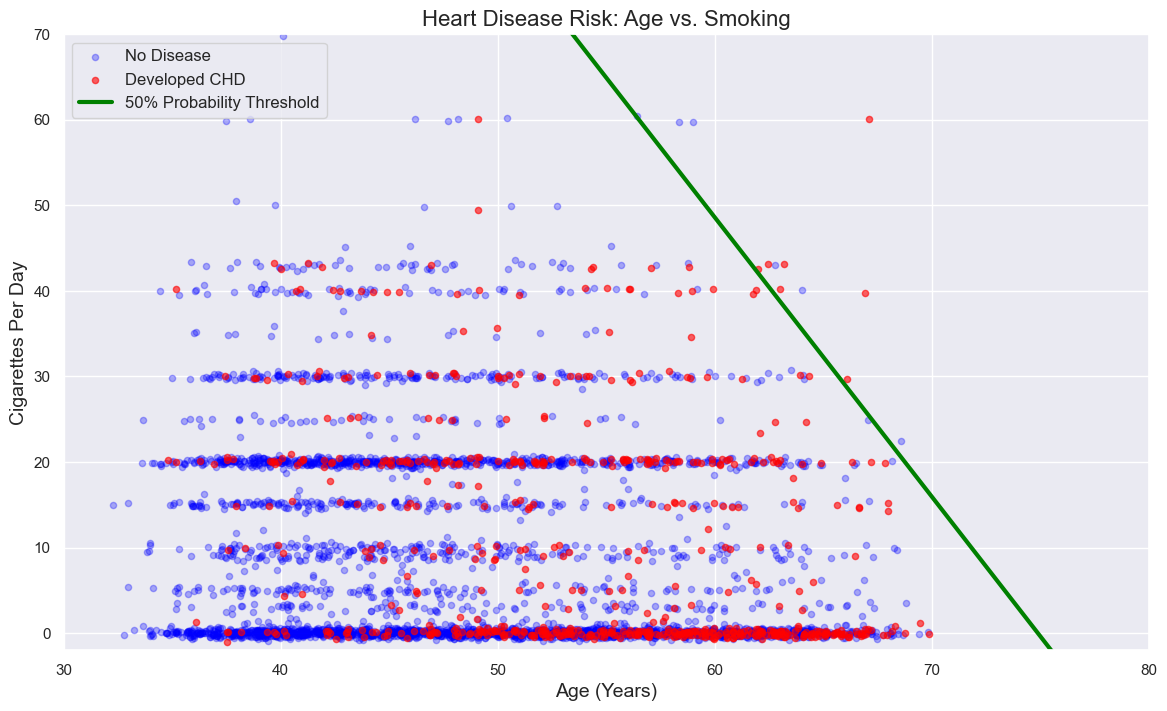

In [11]:
# Set plot style
sns.set(style='darkgrid')

plt.figure(figsize=(14, 8))

# Plot Labels
plt.title('Heart Disease Risk: Age vs. Smoking', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Cigarettes Per Day', fontsize=14)

# Scatter Plot of Actual Data
# We add "jitter" (random noise) to the points because many people have the exact same age/smoking count.
# Without jitter, the dots would stack on top of each other and hide the density.
jitter_age = np.random.normal(0, 0.3, len(X))
jitter_cigs = np.random.normal(0, 0.3, len(X))

plt.scatter(X[Y==0, 0] + jitter_age[Y==0], X[Y==0, 1] + jitter_cigs[Y==0], 
            color='blue', label='No Disease', alpha=0.3, s=20)
plt.scatter(X[Y==1, 0] + jitter_age[Y==1], X[Y==1, 1] + jitter_cigs[Y==1], 
            color='red', label='Developed CHD', alpha=0.6, s=20)

# Calculate Decision Boundary Line
# Formula: ϑ0 + ϑ1*Age + ϑ2*Cigs = 0
# Solve for Cigs (y): Cigs = -(ϑ0 + ϑ1*Age) / ϑ2
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max() + 10, 100)
y_vals = -(ϑ0 + ϑ1 * x_vals) / ϑ2

# Plot the Line
plt.plot(x_vals, y_vals, color='green', linewidth=3, label='50% Probability Threshold')

# Set Limits
plt.ylim(-2, 70) # Cigarettes per day range
plt.xlim(30, 80) # Age range

plt.legend(fontsize=12, loc='upper left')
plt.show()

### Interpretation
You will notice the green line slopes **downwards**. It is obvious that heavy smokers can expect to aquire CHD at an earlier age than non-smokers. 